In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from matplotlib.lines import Line2D

In [2]:
places = ['United States', 'Ohio', 'Delaware', 'Fairfield', 'Franklin', 'Hocking', 'Knox', 'Licking', 'Madison', 'Pickaway', 'Union']

In [3]:
mf_temporal = pd.read_csv("./Data/NCHS_-_Death_rates_and_life_expectancy_at_birth.csv")
m_white = mf_temporal[(mf_temporal.Race == "White") & (mf_temporal.Sex == "Male")]
m_black = mf_temporal[(mf_temporal.Race == "Black") & (mf_temporal.Sex == "Male")]
f_white = mf_temporal[(mf_temporal.Race == "White") & (mf_temporal.Sex == "Female")]
f_black = mf_temporal[(mf_temporal.Race == "Black") & (mf_temporal.Sex == "Female")]
all_races = mf_temporal[(mf_temporal.Race == "All Races") & (mf_temporal.Sex == "Both Sexes")]

Text(0,0.5,'Life Expectancy at time of birth')

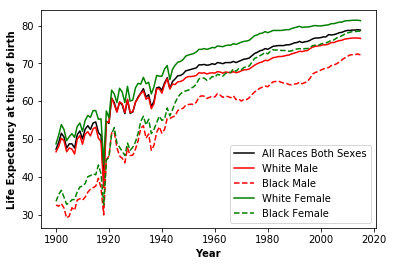

In [4]:
plt.plot(all_races.Year, all_races['Average Life Expectancy (Years)'], 'k-', label='All Races Both Sexes')
plt.plot(m_white.Year, m_white['Average Life Expectancy (Years)'], 'r-', label = 'White Male')
plt.plot(m_black.Year, m_black['Average Life Expectancy (Years)'], 'r--', label = 'Black Male')
plt.plot(f_white.Year, f_white['Average Life Expectancy (Years)'], 'g-', label = 'White Female')
plt.plot(f_black.Year, f_black['Average Life Expectancy (Years)'], 'g--', label = 'Black Female')
plt.legend(loc='lower right')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Life Expectancy at time of birth', fontweight='bold')

Text(0,0.5,'Life Expectancy at time of birth')

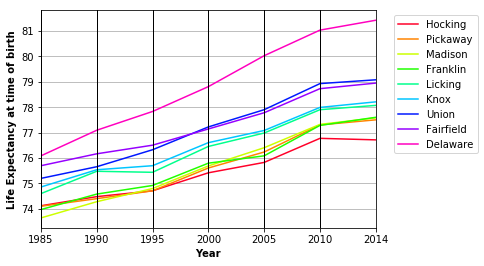

In [5]:
par = pd.read_csv('./Data/LE_ParallelCord.csv')
parallel_coordinates(par[(par['County'].isin(places))], 'County', colormap='gist_rainbow')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Life Expectancy at time of birth', fontweight='bold')

In [6]:
ihme_OH = pd.read_csv('./Data/IHME_county_data_LifeExpectancy_OHIO.csv')
activity_OH = pd.read_csv('./Data/IHME_county_data_PhysicalActivity_OHIO.csv')
obesity_OH = pd.read_csv('./Data/IHME_county_data_Obesity_OHIO.csv')

In [7]:
ihme_Cbus = ihme_OH[(ihme_OH['State/County'].isin(places))]
activity_Cbus = activity_OH[(activity_OH['State/County'].isin(places))]
obesity_Cbus = obesity_OH[(obesity_OH['State/County'].isin(places))]

Text(0,0.5,'Change in LE (years)')

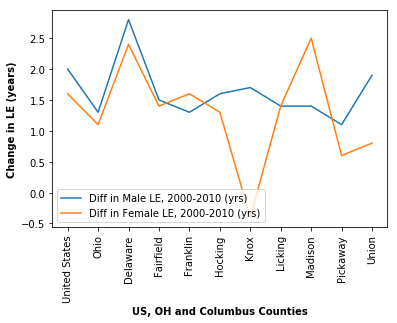

In [8]:
#Grouped horizontal bar chart for all counties
plt.plot(ihme_Cbus['State/County'], ihme_Cbus['Male life expectancy, 2010 (years)'] - ihme_Cbus['Male life expectancy, 2000 (years)'], label="Diff in Male LE, 2000-2010 (yrs)")
plt.plot(ihme_Cbus['State/County'], ihme_Cbus['Female life expectancy, 2010 (years)'] - ihme_Cbus['Female life expectancy, 2000 (years)'], label="Diff in Female LE, 2000-2010 (yrs)")
plt.legend(loc='lower left')
plt.xticks(rotation=90)
plt.xlabel('US, OH and Columbus Counties', fontweight='bold')
plt.ylabel('Change in LE (years)', fontweight='bold')

Text(0,0.5,'Change (%points)')

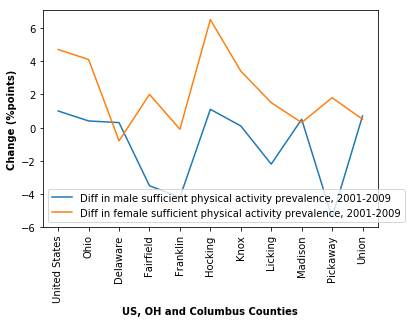

In [23]:
plt.plot(activity_Cbus['State/County'], activity_Cbus['Difference in male sufficient physical activity prevalence, 2001-2009 (percentage points)'], label="Diff in male sufficient physical activity prevalence, 2001-2009")
plt.plot(activity_Cbus['State/County'], activity_Cbus['Difference in female sufficient physical activity prevalence, 2001-2009 (percentage points)'], label="Diff in female sufficient physical activity prevalence, 2001-2009")
plt.legend(bbox_to_anchor=(0,0.001), loc="lower left")
plt.xticks(rotation=90)
plt.xlabel('US, OH and Columbus Counties', fontweight='bold')
plt.ylabel('Change (%points)', fontweight='bold')

Text(0,0.5,'Change (%points)')

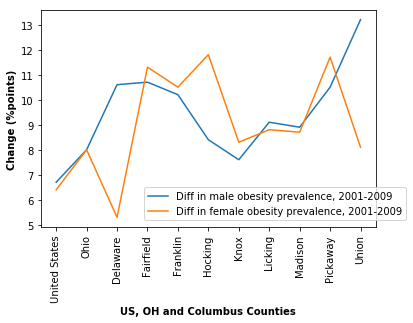

In [11]:
plt.plot(obesity_Cbus['State/County'], obesity_Cbus['Difference in male obesity prevalence, 2001-2009 (percentage points)'], label="Diff in male obesity prevalence, 2001-2009")
plt.plot(obesity_Cbus['State/County'], obesity_Cbus['Difference in female obesity prevalence, 2001-2009 (percentage points)'], label="Diff in female obesity prevalence, 2001-2009")
plt.legend(bbox_to_anchor=(0.7,0.01), loc="lower center")
plt.xticks(rotation=90)
plt.xlabel('US, OH and Columbus Counties', fontweight='bold')
plt.ylabel('Change (%points)', fontweight='bold')

In [12]:
race_deaths_OH = pd.read_csv('./Data/Black_White_Mortality_OH_County_2000_2015.csv')
race_deaths_OH['Deaths/Pop'] = race_deaths_OH.Deaths / race_deaths_OH.Population

Text(0,0.5,'Deaths/Population')

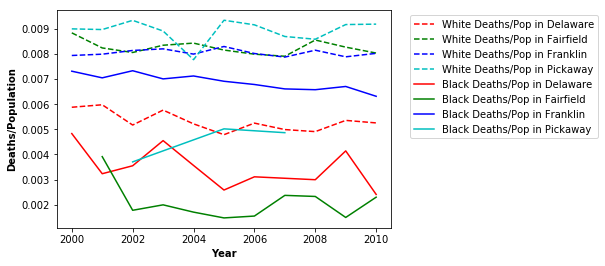

In [13]:
delaware = race_deaths_OH[(race_deaths_OH.County == 'Delaware County, OH') & (race_deaths_OH['Race'] == "Black or African American")]
fairfield = race_deaths_OH[(race_deaths_OH.County == 'Fairfield County, OH') & (race_deaths_OH['Race'] == "Black or African American")]
franklin = race_deaths_OH[(race_deaths_OH.County == 'Franklin County, OH') & (race_deaths_OH['Race'] == "Black or African American")]
pickaway = race_deaths_OH[(race_deaths_OH.County == 'Pickaway County, OH') & (race_deaths_OH['Race'] == "Black or African American")]
delaware_w = race_deaths_OH[(race_deaths_OH.County == 'Delaware County, OH') & (race_deaths_OH['Race'] == "White")]
fairfield_w = race_deaths_OH[(race_deaths_OH.County == 'Fairfield County, OH') & (race_deaths_OH['Race'] == "White")]
franklin_w = race_deaths_OH[(race_deaths_OH.County == 'Franklin County, OH') & (race_deaths_OH['Race'] == "White")]
pickaway_w = race_deaths_OH[(race_deaths_OH.County == 'Pickaway County, OH') & (race_deaths_OH['Race'] == "White")]


plt.plot(delaware_w.Year, delaware_w['Deaths/Pop'], 'r--', label = "White Deaths/Pop in Delaware")
plt.plot(fairfield_w.Year, fairfield_w['Deaths/Pop'], 'g--', label = "White Deaths/Pop in Fairfield")
plt.plot(franklin_w.Year, franklin_w['Deaths/Pop'], 'b--', label = "White Deaths/Pop in Franklin")
plt.plot(pickaway_w.Year, pickaway_w['Deaths/Pop'], 'c--', label = "White Deaths/Pop in Pickaway")
plt.plot(delaware.Year, delaware['Deaths/Pop'], 'r-', label = "Black Deaths/Pop in Delaware")
plt.plot(fairfield.Year, fairfield['Deaths/Pop'],'g-', label = "Black Deaths/Pop in Fairfield")
plt.plot(franklin.Year, franklin['Deaths/Pop'], 'b-', label = "Black Deaths/Pop in Franklin")
plt.plot(pickaway.Year, pickaway['Deaths/Pop'], 'c-', label = "Black Deaths/Pop in Pickaway")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Deaths/Population', fontweight='bold')

In [32]:
causes = pd.read_csv('./Data/Black_White_MortalityCause_Temporal_OH_2000_2015.csv')
causes['Age Adjusted Rate'] = causes['Age Adjusted Rate'].str.replace("\(Unreliable\)", "").apply(float)
causes['Deaths'] = (causes['Deaths']*10000) / causes['Population']

In [33]:
causes05_W = causes[(causes.Year == 2005) & (causes.Race == "White")]
causes05_B = causes[(causes.Year == 2005) & (causes.Race == "Black or African American")]
causes15_W = causes[(causes.Year == 2015) & (causes.Race == "White")]
causes15_B = causes[(causes.Year == 2015) & (causes.Race == "Black or African American")]
causes05_W = causes05_W.groupby(['Cause of death'])['Deaths'].agg(["sum"]).reset_index().sort_values(by = ['sum'], ascending = False)
causes15_W = causes15_W.groupby(['Cause of death'])['Deaths'].agg(["sum"]).reset_index().sort_values(by = ['sum'], ascending = False)
causes05_B = causes05_B.groupby(['Cause of death'])['Deaths'].agg(["sum"]).reset_index().sort_values(by = ['sum'], ascending = False)
causes15_B = causes15_B.groupby(['Cause of death'])['Deaths'].agg(["sum"]).reset_index().sort_values(by = ['sum'], ascending = False)

In [34]:
causesW = causes05_W.merge(causes15_W, on='Cause of death', how='left')
causesW['Diff in Deaths/Population 2015-2005'] = causesW['sum_y'] - causesW['sum_x']
causesW = causesW.dropna(axis=0)

causesB = causes05_B.merge(causes15_B, on='Cause of death', how='left')
causesB['Diff in Deaths/Population 2015-2005'] = causesB['sum_y'] - causesB['sum_x']
causesB = causesB.dropna(axis=0)

In [35]:
causesW = causesW.sort_values(by='Diff in Deaths/Population 2015-2005')
causesB = causesB.sort_values(by='Diff in Deaths/Population 2015-2005')

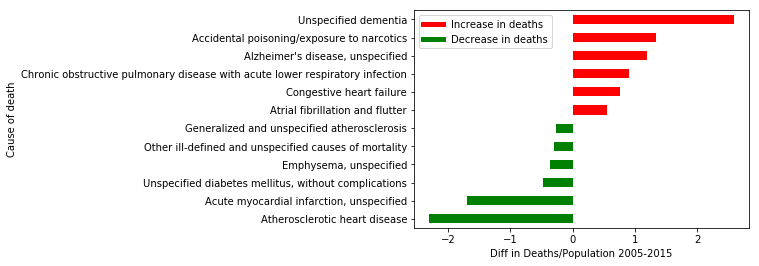

In [40]:
colors = ['r' for i in range(12)]
for i in range(6):
    colors[i] = 'g'
    
causesW_12 = [causesW.head(6), causesW.tail(6)]
causesW_12 = pd.concat(causesW_12)
causesW_12.plot.barh(x='Cause of death', y='Diff in Deaths/Population 2015-2005', color = colors, legend=False)
plt.xlabel('Diff in Deaths/Population 2005-2015')
legend_elements = [Line2D([0], [0], color='r', lw=5, label='Increase in deaths'),
                   Line2D([0], [0], color='g', lw=5, label='Decrease in deaths')]
plt.legend(handles=legend_elements, loc='upper left')

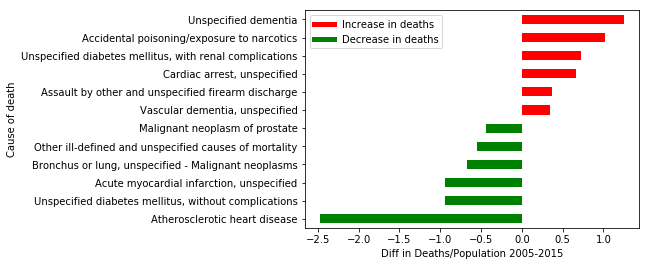

In [37]:
causesB_12 = [causesB.head(6), causesB.tail(6)]
causesB_12 = pd.concat(causesB_12)
causesB_12.plot.barh(x='Cause of death', y='Diff in Deaths/Population 2015-2005', color = colors, legend=False)
plt.xlabel('Diff in Deaths/Population 2005-2015')
legend_elements = [Line2D([0], [0], color='r', lw=5, label='Increase in deaths'),
                   Line2D([0], [0], color='g', lw=5, label='Decrease in deaths')]
plt.legend(handles=legend_elements, loc='upper left')

Text(0,0.5,'Median Household Income ($)')

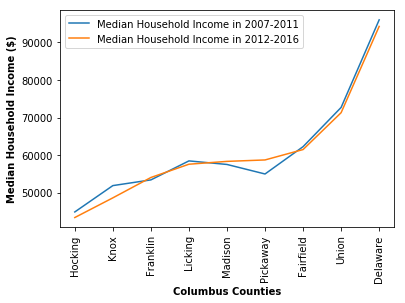

In [42]:
county = pd.read_csv('./Data/OH_Counties_Income_Level.csv')
county = county[county['County'].isin(places)]
county = county.sort_values(by='2012-2016 median household')
county['diff'] = county['2012-2016 median household'] - county['2007-2011 median household']
plt.plot(county['County'], county['2007-2011 median household'], label='Median Household Income in 2007-2011')
plt.plot(county['County'], county['2012-2016 median household'], label='Median Household Income in 2012-2016')
plt.xticks(rotation=90)
plt.legend()
plt.xlabel('Columbus Counties', fontweight='bold')
plt.ylabel('Median Household Income ($)', fontweight='bold')

In [43]:
income = pd.read_csv('./Data/LE_M_F_States_Income_2015.csv')
inc1 = income.sort_values(by='le_raceadj_q1_F')

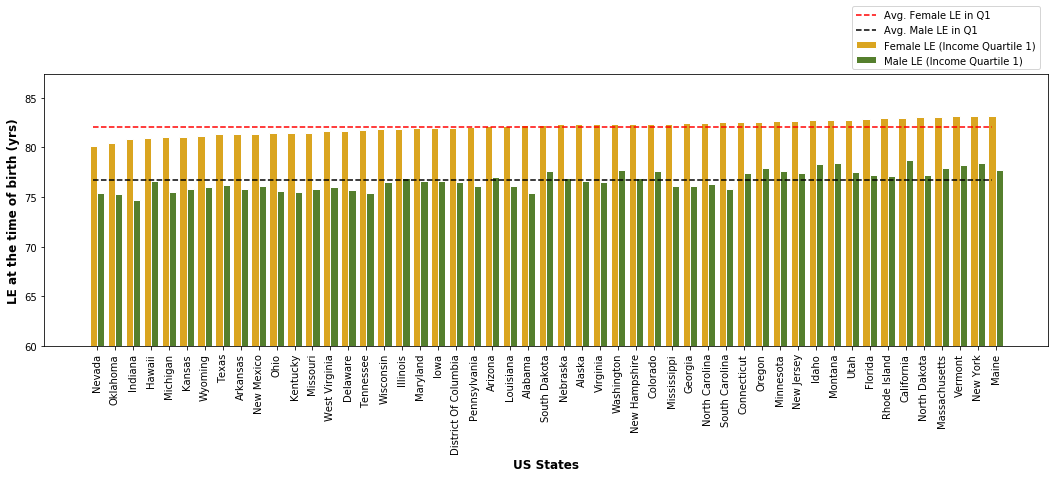

In [73]:
pos = list(range(len(inc1['le_raceadj_q1_M']))) 
barWidth = 0.4 
 
# Plotting the bars
fig, ax = plt.subplots(figsize=(18,5))
 
# Make the plot
plt.bar(pos, inc1['le_raceadj_q1_F'], color='goldenrod', width=barWidth, edgecolor='white', label='Female LE (Income Quartile 1)')
plt.bar([x + barWidth for x in pos], inc1['le_raceadj_q1_M'], color='#557f2d', width=barWidth, edgecolor='white', label='Male LE (Income Quartile 1)')
plt.plot(pos, [inc1['le_raceadj_q1_F'].mean() for p in range(len(pos))], 'r--', label = 'Avg. Female LE in Q1')
plt.plot(pos, [inc1['le_raceadj_q1_M'].mean() for p in range(len(pos))], 'k--', label = 'Avg. Male LE in Q1')

# Add xticks on the middle of the group bars
plt.xlabel('US States', fontweight='bold', fontsize='large')
plt.ylabel('LE at the time of birth (yrs)', fontweight='bold', fontsize='large')
ax.set_xticks([p + 0.5 * barWidth for p in pos])
ax.set_xticklabels(inc1.statename, rotation='vertical')
ax.set_ylim(ymin=60)

# Create legend & Show graphic
plt.legend(bbox_to_anchor=(0.8,1), loc="lower left")
plt.show()


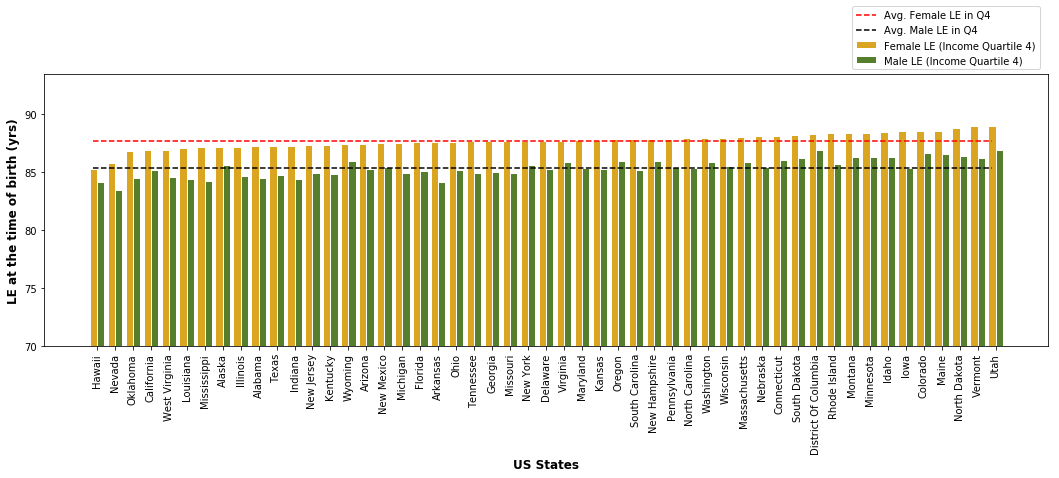

In [74]:
inc4 = income.sort_values(by='le_raceadj_q4_F')
pos = list(range(len(inc1['le_raceadj_q4_M']))) 
barWidth = 0.4 
 
# Plotting the bars
fig, ax = plt.subplots(figsize=(18,5))
 
# Make the plot
plt.bar(pos, inc4['le_raceadj_q4_F'], color='goldenrod', width=barWidth, edgecolor='white', label='Female LE (Income Quartile 4)')
plt.bar([x + barWidth for x in pos], inc4['le_raceadj_q4_M'], color='#557f2d', width=barWidth, edgecolor='white', label='Male LE (Income Quartile 4)')
plt.plot(pos, [inc4['le_raceadj_q4_F'].mean() for p in range(len(pos))], 'r--', label = 'Avg. Female LE in Q4')
plt.plot(pos, [inc4['le_raceadj_q4_M'].mean() for p in range(len(pos))], 'k--', label = 'Avg. Male LE in Q4')

# Add xticks on the middle of the group bars
plt.xlabel('US States', fontweight='bold', fontsize='large')
plt.ylabel('LE at the time of birth (yrs)', fontweight='bold', fontsize='large')
ax.set_xticks([p + 0.5 * barWidth for p in pos])
ax.set_xticklabels(inc4.statename, rotation='vertical')
ax.set_ylim(ymin=70)

# Create legend & Show graphic
plt.legend(bbox_to_anchor=(0.8,1), loc="lower left")
plt.show()

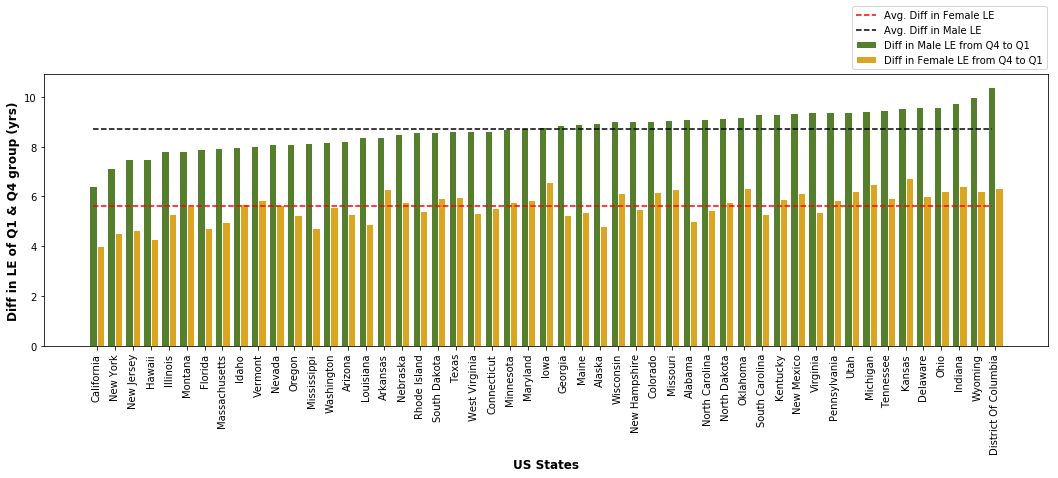

In [71]:
income['diff_male'] = income['le_raceadj_q4_M'] - income['le_raceadj_q1_M']
income['diff_female'] = income['le_raceadj_q4_F'] - income['le_raceadj_q1_F']
inc3 = income.sort_values(by='diff_male')
pos = list(range(len(income['diff_male']))) 
barWidth = 0.4 
 
# Plotting the bars
fig, ax = plt.subplots(figsize=(18,5))
 
# Make the plot
plt.bar(pos, inc3['diff_male'], color='#557f2d', width=barWidth, edgecolor='white', label='Diff in Male LE from Q4 to Q1')
plt.bar([x + barWidth for x in pos], inc3['diff_female'], color='goldenrod', width=barWidth, edgecolor='white', label='Diff in Female LE from Q4 to Q1')
plt.plot(pos, [income['diff_female'].mean() for p in range(len(pos))], 'r--', label = 'Avg. Diff in Female LE')
plt.plot(pos, [income['diff_male'].mean() for p in range(len(pos))], 'k--', label = 'Avg. Diff in Male LE')

# Add xticks on the middle of the group bars
plt.xlabel('US States', fontweight='bold', fontsize='large')
plt.ylabel('Diff in LE of Q1 & Q4 group (yrs)', fontweight='bold', fontsize='large')
ax.set_xticks([p + 0.5 * barWidth for p in pos])
ax.set_xticklabels(inc3.statename, rotation='vertical')

# Create legend & Show graphic
plt.legend(bbox_to_anchor=(0.8,1), loc="lower left")
plt.show()

In [47]:
income_OH = pd.read_csv('./Data/LE_M_F_County_Income_2015.csv')
income_Cbus = income_OH[(income_OH['statename'] == 'Ohio') & (income_OH['cz_name'] == 'Columbus')]

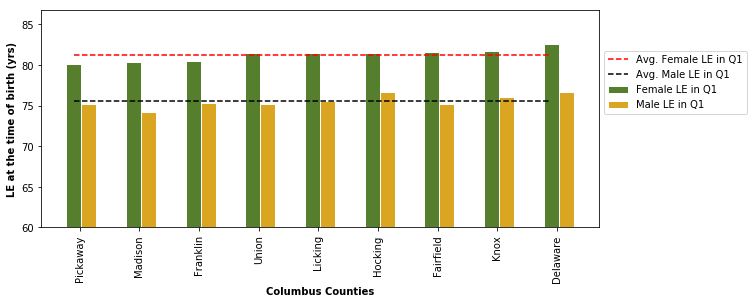

In [70]:
inc3 = income_Cbus.sort_values(by='le_raceadj_q1_F')
pos = list(range(len(income_Cbus['le_raceadj_q1_F']))) 
barWidth = 0.25 
 
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,4))
 
# Make the plot
plt.bar(pos, inc3['le_raceadj_q1_F'], color='#557f2d', width=barWidth, edgecolor='white', label='Female LE in Q1')
plt.bar([x + barWidth for x in pos], inc3['le_raceadj_q1_M'], color='goldenrod', width=barWidth, edgecolor='white', label='Male LE in Q1')
plt.plot(pos, [income_Cbus['le_raceadj_q1_F'].mean() for p in range(len(pos))], 'r--', label = 'Avg. Female LE in Q1')
plt.plot(pos, [income_Cbus['le_raceadj_q1_M'].mean() for p in range(len(pos))], 'k--', label = 'Avg. Male LE in Q1')

# Add xticks on the middle of the group bars
plt.xlabel('Columbus Counties', fontweight='bold', fontsize='medium')
plt.ylabel('LE at the time of birth (yrs)', fontweight='bold', fontsize='medium')
ax.set_xticks([p + 0.4 * barWidth for p in pos])
ax.set_xticklabels(inc3.county_name, rotation='vertical')
ax.set_ylim(ymin=60)

# Create legend & Show graphic
plt.legend(bbox_to_anchor=(1,0.5), loc="lower left")
plt.show()

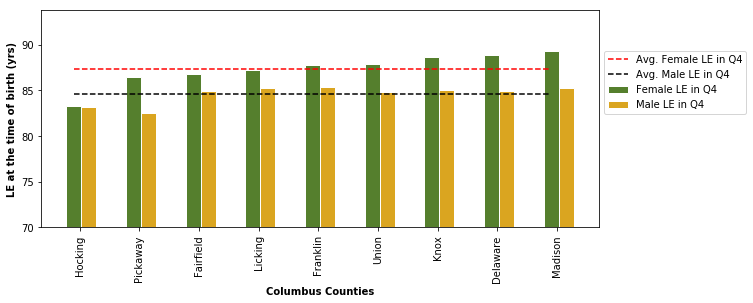

In [69]:
inc3 = income_Cbus.sort_values(by='le_raceadj_q4_F')
pos = list(range(len(income_Cbus['le_raceadj_q4_F']))) 
barWidth = 0.25 
 
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,4))
 
# Make the plot
plt.bar(pos, inc3['le_raceadj_q4_F'], color='#557f2d', width=barWidth, edgecolor='white', label='Female LE in Q4')
plt.bar([x + barWidth for x in pos], inc3['le_raceadj_q4_M'], color='goldenrod', width=barWidth, edgecolor='white', label='Male LE in Q4')
plt.plot(pos, [income_Cbus['le_raceadj_q4_F'].mean() for p in range(len(pos))], 'r--', label = 'Avg. Female LE in Q4')
plt.plot(pos, [income_Cbus['le_raceadj_q4_M'].mean() for p in range(len(pos))], 'k--', label = 'Avg. Male LE in Q4')

# Add xticks on the middle of the group bars
plt.xlabel('Columbus Counties', fontweight='bold', fontsize='medium')
plt.ylabel('LE at the time of birth (yrs)', fontweight='bold', fontsize='medium')
ax.set_xticks([p + 0.4 * barWidth for p in pos])
ax.set_xticklabels(inc3.county_name, rotation='vertical')
ax.set_ylim(ymin=70)

# Create legend & Show graphic
plt.legend(bbox_to_anchor=(1,0.5), loc="lower left")
plt.show()